In this project, I will venture into the realm of disease prediction using machine learning.This dataset contains vital information regarding the diagnosis of heart disease patients. Through the power of machine learning, aim to predict whether an individual is susceptible to heart disease, leveraging features such as chest pain type, age, sex, and more.

Heart disease stands as a prominent cause of morbidity and mortality on a global scale. Predicting cardiovascular disease is a crucial area within clinical data analysis, considering its profound impact on public health. The healthcare industry harbors a vast reservoir of data, and the process of data mining transforms this extensive healthcare repository into actionable insights, facilitating informed decision-making and predictions.

This project unfolds by training machine learning models capable of discerning the presence or absence of heart disease based on a comprehensive set of attributes. To achieve this, I draw upon the Cleveland Heart Disease dataset, sourced from the UCI repository.

Ultimate goal is to empower healthcare professionals and individuals with data-driven insights, enhancing their ability to make early and accurate predictions regarding heart disease.

In [1]:
import pandas as pd

df = pd.read_csv("heart_cleveland_upload.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


My focus shifts to identifying and quantifying null values within the health data. The count of null values (represented as 'sumofnull' in the code) is a crucial metric. It helps to assess data completeness and quality, ensuring aware of any missing information. Recognizing and addressing null values is paramount for accurate and reliable analysis in this project. This meticulous examination of null values contributes to the project's overall data integrity and the generation of meaningful insights.

In [2]:
sumofnull = df.isnull().sum()
sumofnull

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [3]:
datatype = df.dtypes
datatype


age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

Classify the features within  health data into two categories: numerical and categorical

In [4]:
numeric_features = df[['age','trestbps','chol','thalach','oldpeak','condition']]
cat_features = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca','thal']]
                  
#--- Inspect data ---
cat_features

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,0,1,2,0,1,1,0
1,0,0,0,0,0,0,2,0
2,0,0,0,0,0,2,0,0
3,1,0,1,2,0,1,1,0
4,1,0,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...
292,1,3,0,0,0,0,0,2
293,1,3,0,0,0,1,0,2
294,1,3,0,0,1,1,0,2
295,0,3,0,0,0,0,0,0


**Converting Features to Categorical Data Types**

Transform selected features into categorical data types. Specifically,I convert 'sex,' 'cp,' 'fbs,' 'restecg,' 'exang,' 'slope,' 'ca,' and 'thal' into categorical variables. This conversion is a key step in  data preprocessing, as it ensures that these features are treated appropriately in this analysis.

In [5]:
lst = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca','thal']
df[lst]=df[lst].astype('object')
dtype = df.dtypes
dtype

age            int64
sex           object
cp            object
trestbps       int64
chol           int64
fbs           object
restecg       object
thalach        int64
exang         object
oldpeak      float64
slope         object
ca            object
thal          object
condition      int64
dtype: object

**Exploring Feature Correlations**

By generating a heatmap , can visualize the relationships between numerical features . This visualization is pivotal for understanding how these features interact and impact each other within the dataset. Analyzing feature correlations aids in uncovering potential insights and patterns that will be crucial for project's data-driven conclusions and decision-making.

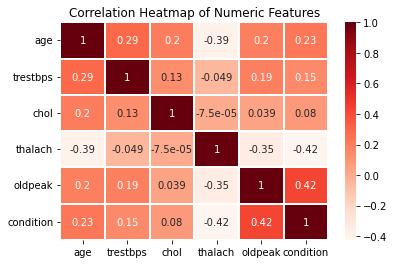

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_data = df[numeric_features].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_data, annot=True, cmap='Reds', linewidths=0.1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

**Visualizing Health Conditions**

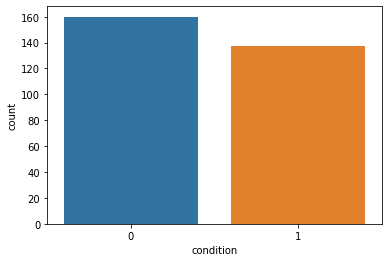

In [8]:
condition_ax = sns.countplot(x='condition', data=df)

plt.show()

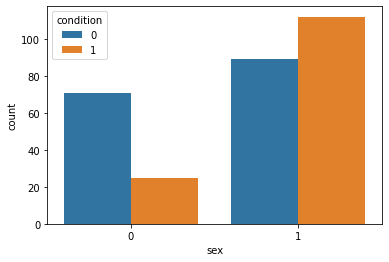

In [9]:
#  Analyzing Health Conditions by Gender
sex_ax = sns.countplot(x='sex', hue='condition', data=df)
plt.show()

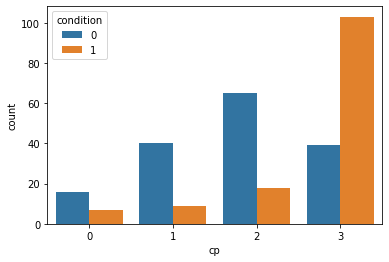

In [10]:
#Examining Chest Pain Types and Health Conditions
cp_ax = sns.countplot(x='cp', hue='condition', data=df)
plt.show()

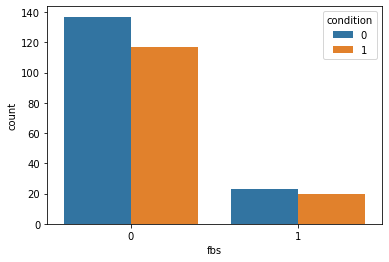

In [11]:
#Investigating Fasting Blood Sugar Levels and Health Conditions
fbs_ax = sns.countplot(x='fbs',hue='condition', data=df)
plt.show()

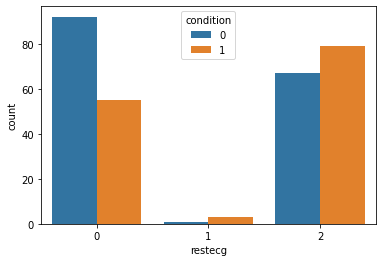

In [12]:
#Analyzing Resting Electrocardiographic Results and Health Conditions
restecg_ax = sns.countplot(x='restecg', hue='condition', data = df)
plt.show()

**Examining Exercise-Induced Angina and Health Conditions**

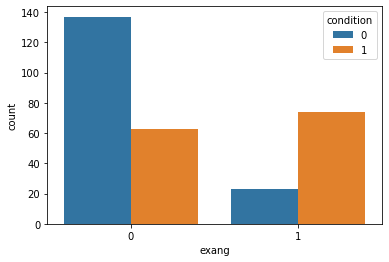

In [13]:
exang_ax = sns.countplot(x='exang', hue='condition', data=df)
plt.show()

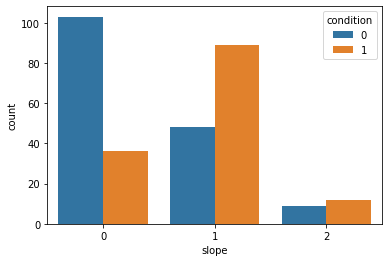

In [14]:
# Investigating the Slope of the ST Segment and Health Conditions
slope_ax = sns.countplot(x='slope',hue='condition',data=df)
plt.show()

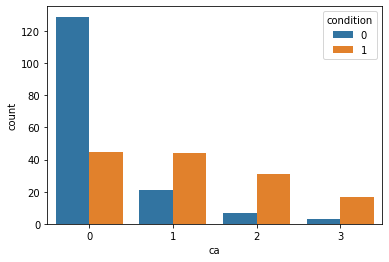

In [15]:
# Analyzing the Number of Major Vessels Colored by Fluoroscopy and Health Conditions
ca_ax = sns.countplot(x='ca',hue='condition',data=df)
plt.show()

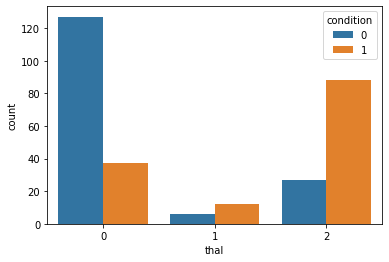

In [16]:
# Examining Thalassemia and Health Conditions
thal_ax = sns.countplot(x='thal',hue='condition',data=df)

plt.show()

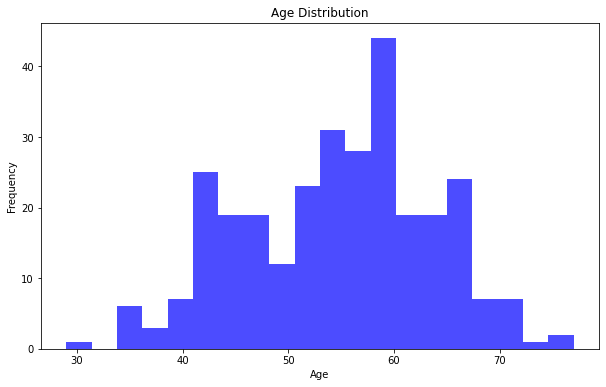

In [18]:
age_col = df['age']


plt.figure(figsize=(10, 6))
plt.hist(age_col, bins=20, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()

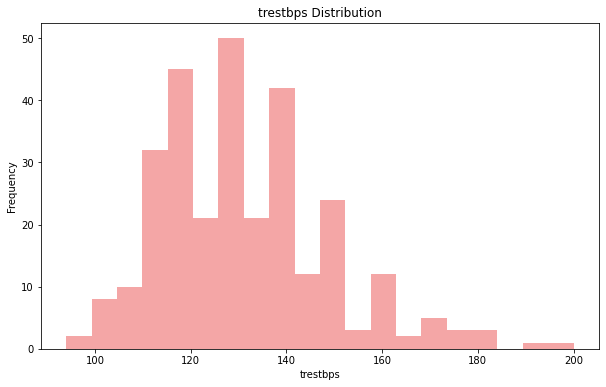

In [19]:
trestbps_col = df['trestbps']
plt.figure(figsize = (10,6))
plt.hist(trestbps_col, bins=20, color='lightcoral',alpha=0.7)
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.title('trestbps Distribution')
plt.show()

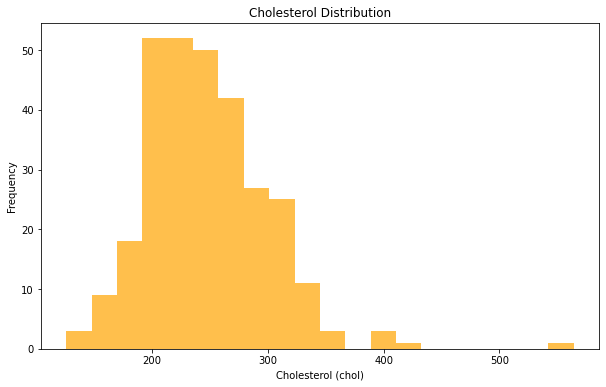

In [21]:
chol_col = df['chol']
plt.figure(figsize = (10,6))
plt.hist(chol_col, bins=20, color='orange',alpha=0.7)
plt.xlabel('Cholesterol (chol)')
plt.ylabel('Frequency')
plt.title('Cholesterol Distribution')
plt.show()


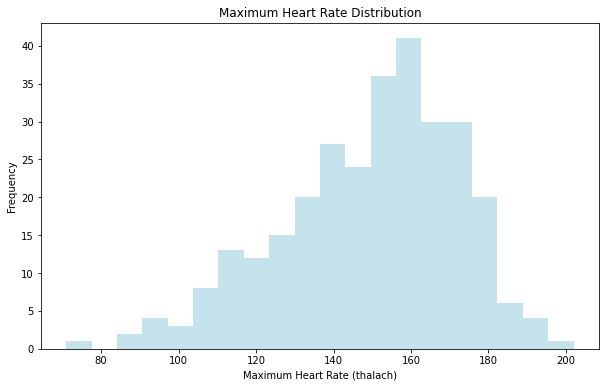

In [22]:
thalach_col = df['thalach']
plt.figure(figsize = (10,6))
plt.hist(thalach_col, bins=20, color='lightblue',alpha=0.7)
plt.xlabel('Maximum Heart Rate (thalach)')
plt.ylabel('Frequency')
plt.title('Maximum Heart Rate Distribution')
plt.show()

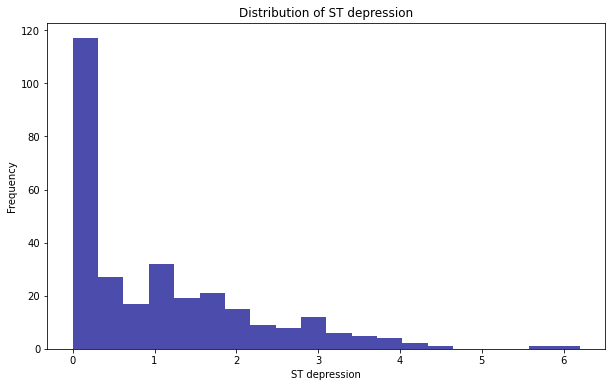

In [25]:
oldpeak_col = df['oldpeak']
plt.figure(figsize = (10,6))
plt.hist(oldpeak_col, bins=20, color='darkblue',alpha=0.7)
plt.xlabel('ST depression')
plt.ylabel('Frequency')
plt.title('Distribution of ST depression')
plt.show()


 By generating this plot, can gain insights into how chest pain types are distributed across different age groups and their association with health conditions. This visualization is essential for understanding how chest pain and age impact health outcomes, a significant aspect of  project's analysis.



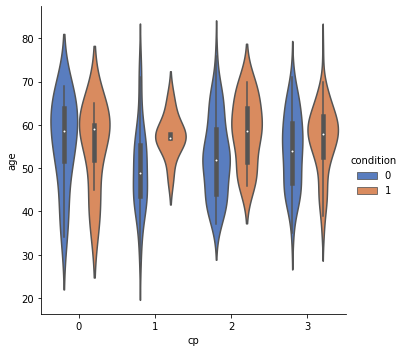

In [26]:
violinplt = sns.catplot(x='cp', y='age', hue='condition', data=df, kind='violin', palette='muted')
plt.show()

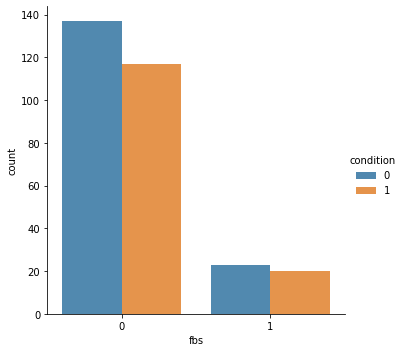

In [27]:
countplt = sns.catplot(x='fbs', hue='condition', data=df, kind='count', alpha=0.85)
plt.show()


***Encoding Categorical Features***

In [28]:
categorical_cols=['cp', 'thal', 'slope']

for col in categorical_cols:
    df[col] = df[col].astype(int)

df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix_sep='_', dtype=int)

print(df_encoded.dtypes)


age            int64
sex           object
trestbps       int64
chol           int64
fbs           object
restecg       object
thalach        int64
exang         object
oldpeak      float64
ca            object
condition      int64
cp_0           int32
cp_1           int32
cp_2           int32
cp_3           int32
thal_0         int32
thal_1         int32
thal_2         int32
slope_0        int32
slope_1        int32
slope_2        int32
dtype: object


Create the variable 'x' by excluding the 'condition' column, which serves as  feature set. The 'y' variable is defined as the 'condition' column, representing target variable. 

In [29]:
x =df_encoded.drop('condition', axis=1)

y = df_encoded['condition']

***Scaling Features***

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()

x_scaled = scaling.fit_transform(x)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, train_size=0.8, test_size=0.2, random_state=4)

***Building and Evaluating Logistic Regression Model***

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

lr_cv_results = cross_val_score(lr_model, x_scaled, y, cv=10)
lr_mean_score = round(lr_cv_results.mean(), 4)

lr_mean_score

0.8211

***Building and Evaluating Linear Discriminant Analysis Model***

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

ldr_model = LinearDiscriminantAnalysis()

ldr_model.fit(X_train, Y_train)

ldr_cv_results = cross_val_score(ldr_model, x_scaled, y, cv=10)
ldr_mean_score = round(ldr_cv_results.mean(), 4)

ldr_mean_score 

0.8215

***Building and Evaluating K-Nearest Neighbors (KNN) Model***

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, Y_train)
knn_cv_results = cross_val_score(knn_model, x_scaled, y, cv=10)

knn_mean_score = round(knn_cv_results.mean(), 4)
knn_std_score = round(knn_cv_results.std(), 4)

print(knn_mean_score)
print(knn_std_score)

0.7877
0.1742


C:\Users\ABHILASH\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ABHILASH\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

***Building and Evaluating Decision Tree Classifier Model***

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, Y_train)
dt_cv_results = cross_val_score(dt_model, x_scaled, y, cv=10)
dt_mean_score = round(dt_cv_results.mean(), 4)
dt_mean_score

0.6494

**Building and Evaluating Random Forest Classifier Model**

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

num_trees = 100
max_features = 'sqrt' 

rf_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

rf_model.fit(X_train, Y_train)
rf_cv_results = cross_val_score(rf_model, x_scaled, y, cv=10)


rf_mean_score = round(rf_cv_results.mean(), 4)
rf_mean_score 

0.7809

***Building and Evaluating Gaussian Naive Bayes Model***

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb_model = GaussianNB()

gnb_model.fit(X_train, Y_train)
gnb_cv_results = cross_val_score(gnb_model, x_scaled, y, cv=10)

gnb_mean_score = round(gnb_cv_results.mean(), 4)

gnb_mean_score

0.781

**Evaluating Model Performance**

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gnb_model.predict(X_test)


accuracy = accuracy_score(Y_test, y_pred)

cm = confusion_matrix(Y_test, y_pred)

cr = classification_report(Y_test, y_pred)

print("Accuracy Score:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)


Accuracy Score: 0.7666666666666667

Confusion Matrix:
 [[28  5]
 [ 9 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        33
           1       0.78      0.67      0.72        27

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60



**Making Predictions with Gaussian Naive Bayes Model**

In [42]:
data = [[0.254, 1, 0.487, 0.362,  ## age_scaled, sex, trestbps_scaled, chol
             1, 0.5, 0.641, 1,  ## fbs, restecg_scaled, thalach_scaled, exang
             0.672, 0.863, 0, 0,  ## oldpeak_scaled, ca_scaled, cp_0, cp_1
             0, 1, 0, 0,  ## cp_2, cp_3, thal_0, thal_1
             0, 1, 0, 1]]  ## thal_2, thal_3, slope_0, slope_1, slope_2


prediction = gnb_model.predict(data)

prediction

array([1], dtype=int64)